# Multiple Linear Regression

## Objectives

- Dealing with categorical variables

- Diagnosis of the model fit

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

## for correlation matrices
import seaborn as sns
%matplotlib inline

## for linear models
import statsmodels.api as sm

In [2]:
## this is the Credit card dataset

df = pd.read_csv('data/Credit.csv', index_col =0)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In this notebook, we would like to understand 'balance' from other variables.

In [5]:
## Goal: Inference  -- p_values, multicollinearity-collinearity
## Understand which variables affecting balance

## Goal: Prediction: -- R_square
## To be able to make a good prediction for a given new customer

# Murat = [60, 4000, 560, 3, 35, 25, 'Male', 'Yes', 'Yes', 'World Citizen']   -> ?


In [6]:
# Define the problem
outcome = 'Balance'

# Note that we excluded balance from x_cols.

x_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity']

## Dealing with Categorical Variables


### With Pandas get_dummies

In [7]:
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [10]:
## number of unique values in 'Ethnicity'
df.Ethnicity.nunique()

3

In [11]:
df.Ethnicity.value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [13]:
## Determine and record the categorical variables
categorical_variables = ['Gender', 'Student', 'Married', 'Ethnicity']

In [18]:
## easy but not recommended in deployment level.

df_ohe = pd.get_dummies(df[x_cols], columns= categorical_variables, drop_first =True)
print(df_ohe.shape)
df_ohe.head(15)


(400, 11)


,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,0,0,1,0,1
2,106.025,6645,483,3,82,15,1,1,1,1,0
3,104.593,7075,514,4,71,11,0,0,0,1,0
4,148.924,9504,681,3,36,11,1,0,0,1,0
5,55.882,4897,357,2,68,16,0,0,1,0,1
6,80.180,8047,569,4,77,10,0,0,0,0,1
7,20.996,3388,259,2,37,12,1,0,0,0,0
8,71.408,7114,512,2,87,9,0,0,0,1,0
9,15.125,3300,266,5,66,13,1,0,0,0,1
10,71.061,6819,491,3,41,19,1,1,1,0,0


### With sklearn One Hot Encoder

In [20]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

In [25]:
## create an encoder object. This will help us to convert
## categorical variables to new columns
encoder = OneHotEncoder(handle_unknown= 'error',
                        drop='first',
                        categories= 'auto' )

## Create an columntransformer object.
## This will help us to merge transformed columns
## with the rest of the dataset.

ct = ColumnTransformer(transformers =[('ohe', encoder, categorical_variables)], remainder= 'passthrough')
ct.fit(df[x_cols])
X = ct.transform(df[x_cols])

In [22]:
X.shape

(400, 11)

Now we let's try to understand what it means to add categorical variables to our model.

p85 of ISLR

In [23]:
X

array([[ 0.,  0.,  1., ...,  2., 34., 11.],
       [ 1.,  1.,  1., ...,  3., 82., 15.],
       [ 0.,  0.,  0., ...,  4., 71., 11.],
       ...,
       [ 1.,  0.,  1., ...,  5., 67., 12.],
       [ 0.,  0.,  1., ...,  1., 44., 13.],
       [ 1.,  0.,  0., ...,  5., 64.,  7.]])

In [34]:
columns = ['ohe__x0_Female',
 'ohe__x1_Yes',
 'ohe__x2_Yes',
 'ohe__x3_Asian',
 'ohe__x3_Caucasian'] + ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']
X = pd.DataFrame(X, columns = columns)
X.head(3)

,ohe__x0_Female,ohe__x1_Yes,ohe__x2_Yes,ohe__x3_Asian,ohe__x3_Caucasian,Income,Limit,Rating,Cards,Age,Education
0,0.0,0.0,1.0,0.0,1.0,14.891,3606.0,283.0,2.0,34.0,11.0
1,1.0,1.0,1.0,1.0,0.0,106.025,6645.0,483.0,3.0,82.0,15.0
2,0.0,0.0,0.0,1.0,0.0,104.593,7075.0,514.0,4.0,71.0,11.0


In [35]:
## Using Statsmodels we fit a linear regression to Credit dataset.
y = df.Balance.values
Xconst = sm.add_constant(X)
model = sm.OLS(y, Xconst, hasconst=True)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 17 Mar 2020   Prob (F-statistic):          1.11e-253
Time:                        14:21:18   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -479.2079     35.774    -13.395      0.000    -549.543    -408.873
ohe__x0_Female      -10.6532      9.914     -1.075      0.283     -30.145       8.839
ohe__x1_Yes         425.7474     16.723     25.459      0.000     392.869     458.626
ohe__x2_Yes          -8.5339     10.363     -0.824      0.411     -28.908      11.841
ohe__x3_Asian        16.8042     14.119      1.190      0.235     -10.955      44.564
ohe__x3_Caucasian    10.1070     12.210      0.828      0.408     -13.899      34.113
Income               -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                 0.1909      0.033      5.824      0.000       0.126       0.255
Rating                1.1365      0.491      2.315      0.021       0.171       2.102
Cards                17.7245      4.341      4.083      0.000       9.190      26.259
Age                  -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education            -1.0989      1.598     -0.688      0.492      -4.241       2.043
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
R_squared = 0.955

n = len(X)

p = len(X.columns)

adj_R_squared = 1- (1-R_squared)*(n-1)/(n-p-1)
adj_R_squared

0.9537242268041237

Note that the $R^{2}$ and $R^{2}_{adj}$ increased significantly but at the same time some predictors p_values are not significant anymore.

W can easily convert it to an adjusted $R^{2}$ by using the formula:

$$ \bar{R}^{2} = 1 - (1- R^{2})\frac{n-1}{n-p-1}$$

where $p$ is the total number of features used to train model.

[Wikipedia-$R^{2}$](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

### Multicollinearity

As we discussed before the multicollinearity is a problem for interprettability and confidence intervels. Now we will see how to detect multicolinearity and how to solve this problem.

[Statistics by Jim - Multicollinearity in linear regression](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)


[Wikipedia VIF - Calculation and Analysis](https://en.wikipedia.org/wiki/Variance_inflation_factor)

In [107]:
## One way of detecting multicollinearity is Variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
X.head(3)

,ohe__x0_Female,ohe__x1_Yes,ohe__x2_Yes,ohe__x3_Asian,ohe__x3_Caucasian,Income,Limit,Rating,Cards,Age,Education
0,0.0,0.0,1.0,0.0,1.0,14.891,3606.0,283.0,2.0,34.0,11.0
1,1.0,1.0,1.0,1.0,0.0,106.025,6645.0,483.0,3.0,82.0,15.0
2,0.0,0.0,0.0,1.0,0.0,104.593,7075.0,514.0,4.0,71.0,11.0


In [110]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(columns, vif))

[('ohe__x0_Female', 2.0462077289271345),
 ('ohe__x1_Yes', 1.14612942952969),
 ('ohe__x2_Yes', 2.6660634395811846),
 ('ohe__x3_Asian', 1.9698628230287345),
 ('ohe__x3_Caucasian', 2.8396958263416825),
 ('Income', 7.2356765374313285),
 ('Limit', 1083.2720052876896),
 ('Rating', 1282.5375779428716),
 ('Cards', 8.180062549757086),
 ('Age', 9.73328451443485),
 ('Education', 12.01740891845775)]

In [16]:
## Check the above link from wikipedia
## and try to figure out what the vif score corresponds to. 

## Let's try to show very quickly that our
## interpretation is correct
## We will focus on vif score for 
## Passenger variable only.

In the literature, you might see that it is suggested that if VIF> 10 then this column can  be dropped. Some other resources say if VIF > 5 it is ok to drop a column. Note that these corresponds to $R^{2} = 0.90$ and $R^{2} = 0.80$ respectively. In this case, we can consider to drop 'weight' feature as its VIF >5. Let's see how this effects the model.

In [112]:
X_without_rating = X.drop(columns = ['Rating'] )

In [113]:
X_without_rating.head()

,ohe__x0_Female,ohe__x1_Yes,ohe__x2_Yes,ohe__x3_Asian,ohe__x3_Caucasian,Income,Limit,Cards,Age,Education
0,0.0,0.0,1.0,0.0,1.0,14.891,3606.0,2.0,34.0,11.0
1,1.0,1.0,1.0,1.0,0.0,106.025,6645.0,3.0,82.0,15.0
2,0.0,0.0,0.0,1.0,0.0,104.593,7075.0,4.0,71.0,11.0
3,1.0,0.0,0.0,1.0,0.0,148.924,9504.0,3.0,36.0,11.0
4,0.0,0.0,1.0,0.0,1.0,55.882,4897.0,2.0,68.0,16.0


In [114]:
Xconst = sm.add_constant(X_without_rating)

model = sm.OLS(y, Xconst, hasconst= True)

res = model.fit()

res.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     815.7
Date:                Tue, 17 Mar 2020   Prob (F-statistic):          5.43e-254
Time:                        13:26:24   Log-Likelihood:                -2401.4
No. Observations:                 400   AIC:                             4825.
Df Residuals:                     389   BIC:                             4869.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -448.9472     33.487    -13.407      0.000    -514.785    -383.109
ohe__x0_Female      -10.5465      9.969     -1.058      0.291     -30.147       9.054
ohe__x1_Yes         429.3167     16.744     25.639      0.000     396.396     462.238
ohe__x2_Yes          -5.9068     10.358     -0.570      0.569     -26.272      14.458
ohe__x3_Asian        14.7248     14.169      1.039      0.299     -13.133      42.583
ohe__x3_Caucasian     9.8899     12.278      0.806      0.421     -14.249      34.029
Income               -7.7682      0.235    -33.049      0.000      -8.230      -7.306
Limit                 0.2664      0.004     75.100      0.000       0.259       0.273
Cards                23.2658      3.642      6.388      0.000      16.106      30.426
Age                  -0.6079      0.296     -2.056      0.040      -1.189      -0.027
Education            -1.3847      1.602     -0.864      0.388      -4.535       1.765
==============================================================================
Omnibus:                       39.489   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.373
Skew:                           0.831   Prob(JB):                     3.13e-11
Kurtosis:                       3.374   Cond. No.                     3.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
vif = [variance_inflation_factor(X_without_rating.values, i) for i in range(X_without_rating.shape[1])]
list(zip(X_without_rating.columns.tolist(), vif))

[('ohe__x0_Female', 2.0391215856200127),
 ('ohe__x1_Yes', 1.1348177705434688),
 ('ohe__x2_Yes', 2.598013183185495),
 ('ohe__x3_Asian', 1.9687316963021193),
 ('ohe__x3_Caucasian', 2.81371343988567),
 ('Income', 7.234320152516765),
 ('Limit', 13.133486278975044),
 ('Cards', 5.090847660018308),
 ('Age', 9.339359126335953),
 ('Education', 11.477450843507937)]

## Feature Selection

In [118]:
## sklearn.feature_selection has a class
## called RFE for recursive feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

For more details and the documentation of RFE you can check:

[sklearn- Recursive Feature Selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

[Feature Selection in sklearn -RFE](https://scikit-learn.org/stable/modules/feature_selection.html#rfe)

[Other methods in sklearn fo](https://scikit-learn.org/stable/modules/feature_selection.html#)

In [120]:
## instantiate the linear regression object
lm = LinearRegression()
## instantiate the selector object
selector = RFE(lm, n_features_to_select=8)
X = X
y = y

## fit the model
selector.fit(X,y)

## check which columns are selected
ind = selector.get_support()
print(ind)

## Note that we got different columns
X.loc[:, ind].head()

[ True  True  True  True  True  True False  True  True False False]


,ohe__x0_Female,ohe__x1_Yes,ohe__x2_Yes,ohe__x3_Asian,ohe__x3_Caucasian,Income,Rating,Cards
0,0.0,0.0,1.0,0.0,1.0,14.891,283.0,2.0
1,1.0,1.0,1.0,1.0,0.0,106.025,483.0,3.0
2,0.0,0.0,0.0,1.0,0.0,104.593,514.0,4.0
3,1.0,0.0,0.0,1.0,0.0,148.924,681.0,3.0
4,0.0,0.0,1.0,0.0,1.0,55.882,357.0,2.0


## Normality of Errors and Residual Plots

In [22]:
X = df[['Weight', 'Wheelbase', 'Fueltank']]
y_predict = lm3.predict(X)

residuals = y - y_predict

NameError: name 'lm3' is not defined

In [23]:
plt.scatter(y_predict, residuals)
plt.plot(y_predict, [0 for i in range(len(df))])

plt.show()

NameError: name 'y_predict' is not defined

In [52]:
import scipy.stats as stats

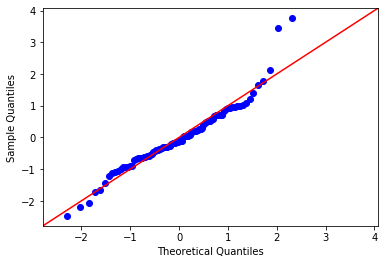

In [49]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## Potential Problems in Multiple Linear Regression

In a perfect linear regression model we expect no pattern in the residual plots. In that sense, any pattern in the residual plots corresponds to a violation of assumptions.

- 1. Non-linearity of the data

U shape patter suggests that we have a non-linear relation between the predictors and the target. In thsi case adding $\log{X}$, $\sqrt{X}$ or $X^{2}$ terms to the model might be helpful.

<img src='img/non_linearity.png' width=550>

- 2. Correlation of the Error Terms 

This means the errors $\epsilon_{1}, \dots, \epsilon_{i}$ tells nothing about the error $\epsilon_{i+1}$. If we have correlation between the error terms then confidence intervals are narrower than they should be. 

- A classic example where we might get correlated errors is when we are dealing with time series data.

<img src='img/timeseries_errors.png' width=550>

- 3. Non-constant variance of the errors

Possible solutions: try $\log(Y)$ or $\sqrt{Y}$ transformations, in some cases giving weights to observations.

<img src='img/nonconstant_varience.png' width=550>

- 4. Outliers

<img src='img/outliers.png' width=550>

For more on Studentized residuals, check:

[PennState - Studentized residuals](https://newonlinecourses.science.psu.edu/stat462/node/247/)

[Statsmodel.Stats outliers_influence module documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)


In [77]:
from statsmodels import stats

import numpy as np

In [55]:
X = sm.add_constant(X)
model  = sm.OLS(y,X)
results = model.fit()


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


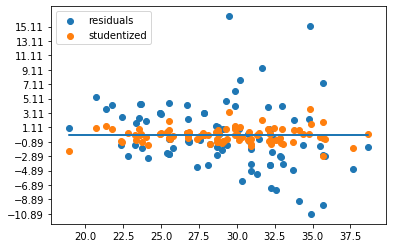

In [78]:
of = stats.outliers_influence.OLSInfluence(results)

plt.scatter(y_predict, residuals, label = 'residuals')
plt.scatter(y_predict, of.resid_studentized, label= 'studentized')
plt.plot(y_predict, [0 for i in range(len(df))])
plt.yticks(np.arange(residuals.min(), residuals.max(), 2))
plt.legend()

Typical expected values are between -3 and 3. So in that sense we can say we don't have outliers in this model.

5. High Leverage Points 

<img src='img/leverage.png' width=550>

For more details on leverage read:

    - p97 of ISLR

[Penn State Stats](https://newonlinecourses.science.psu.edu/stat462/node/171/)

[Statsmodel - Documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

[A blogpost with implementation](http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/)


- 6. Collinearity

Which we discussed earlier.

## Further Reading

To address the collinearity in multiple linear regression we can also use methods like Principal Component Analysis(PCA) and Partial Least Squares (PLS).

[Wikipedia- Partial Least Squares ](https://en.wikipedia.org/wiki/Partial_least_squares_regression)

[Partial Least Squares](http://www.statsoft.com/Textbook/Partial-Least-Squares)

[sklearn - Partial Least Squares](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression)